### Imports

In [1]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import csv

### Webscraping

In [2]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [3]:
newslist = []

In [4]:
def getDate(Day):

    URL = f'http://archive.wn.com/{Day}/worldnews/'

    source = requests.get(URL).text

    soup = BeautifulSoup(source, 'lxml')
    for item in soup.find('div', class_='top-stories-worldwide').find_all('div', class_='nl-item'):
        Publisher_Date = item.p.text.strip()
        NewsPiece = {
        'Title' : item.h4.text,
        'Publisher' : Publisher_Date.split(' | ')[0],
        'Date' : Day,
        'Link' : item.find('a').get('href') 
        }
        newslist.append(NewsPiece)
    
    return

# I am doing a getDate2 because I foud out that in December 2020, the site structure was different
def getDate2(Day):

    URL = f'http://archive.wn.com/{Day}/worldnews/'

    source = requests.get(URL).text

    soup = BeautifulSoup(source, 'lxml')
    for item in soup.find('div', class_='top-stories-worldwide').find_all('div', class_='nl-item'):
        Publisher_Date = item.find('div', class_='item-meta').a.text.strip()
        NewsPiece = {
        'Title' : item.h4.text,
        'Publisher' : Publisher_Date.split(' | ')[0],
        'Date' : Day,
        'Link' : item.find('a').get('href') 
        }
        newslist.append(NewsPiece)
    
    return

for day in range(1, 15):
    date = '2019/12/' + str(day).zfill(2)
    getDate(date)

for day in range(1, 3):
    date = '2020/12/' + str(day).zfill(2)
    getDate(date)

for day in range(3, 15):
    date = '2020/12/' + str(day).zfill(2)
    getDate2(date)


df = pd.DataFrame(newslist)
#to save a csv copy
df.to_csv(r'dataset.csv')

### Data Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      207 non-null    object
 1   Publisher  207 non-null    object
 2   Date       207 non-null    object
 3   Link       207 non-null    object
dtypes: object(4)
memory usage: 6.6+ KB


In [6]:
df.describe(include='all')

,Title,Publisher,Date,Link
count,207,207,207,207
unique,205,81,28,205
top,"Multiple rockets strike Kabul, kill at least o...",The Independent,2020/12/08,https://article.wn.com/view/2020/12/12/US_appr...
freq,2,11,8,2


In [7]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,Title,Publisher,Date,Link
0,India and Japan hold inaugural security talks,Stars and Stripes,2019/12/01,https://article.wn.com/view/2019/12/01/India_a...
1,"Plane crash kills nine, injures three in South...",Yahoo Daily News,2019/12/01,https://article.wn.com/view/2019/12/01/Plane_c...
2,China accuses UN rights chief of inflaming Hon...,Stars and Stripes,2019/12/01,https://article.wn.com/view/2019/12/01/China_a...
3,Merry Clickmas: Black Friday online sales hit ...,Federal News Radio,2019/12/01,https://article.wn.com/view/2019/12/01/Merry_C...
4,People convicted of terror offenses must serve...,Reuters,2019/12/01,https://article.wn.com/view/2019/11/30/People_...


we can see 'US approves Pfizzer vacine' and 'Multiple rockets strike Kabul, kill at least once' news occured twice each.




In [8]:
# dropping the duplicates
df.drop_duplicates(subset=['Title'], keep='first', inplace=True)
df.head()

,Title,Publisher,Date,Link
0,India and Japan hold inaugural security talks,Stars and Stripes,2019/12/01,https://article.wn.com/view/2019/12/01/India_a...
1,"Plane crash kills nine, injures three in South...",Yahoo Daily News,2019/12/01,https://article.wn.com/view/2019/12/01/Plane_c...
2,China accuses UN rights chief of inflaming Hon...,Stars and Stripes,2019/12/01,https://article.wn.com/view/2019/12/01/China_a...
3,Merry Clickmas: Black Friday online sales hit ...,Federal News Radio,2019/12/01,https://article.wn.com/view/2019/12/01/Merry_C...
4,People convicted of terror offenses must serve...,Reuters,2019/12/01,https://article.wn.com/view/2019/11/30/People_...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 206
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      205 non-null    object
 1   Publisher  205 non-null    object
 2   Date       205 non-null    object
 3   Link       205 non-null    object
dtypes: object(4)
memory usage: 8.0+ KB


In [10]:
#assigning an id to each title
df.insert(0, 'id', range(0, len(df)))
df.head()

,id,Title,Publisher,Date,Link
0,0,India and Japan hold inaugural security talks,Stars and Stripes,2019/12/01,https://article.wn.com/view/2019/12/01/India_a...
1,1,"Plane crash kills nine, injures three in South...",Yahoo Daily News,2019/12/01,https://article.wn.com/view/2019/12/01/Plane_c...
2,2,China accuses UN rights chief of inflaming Hon...,Stars and Stripes,2019/12/01,https://article.wn.com/view/2019/12/01/China_a...
3,3,Merry Clickmas: Black Friday online sales hit ...,Federal News Radio,2019/12/01,https://article.wn.com/view/2019/12/01/Merry_C...
4,4,People convicted of terror offenses must serve...,Reuters,2019/12/01,https://article.wn.com/view/2019/11/30/People_...


In [11]:
# Splitting the Date column so we can have 'Year', 'Date' for analysis purposes
df['Year'] = [x[0:4] for x in df['Date']]
df['Day'] = [x[8:10] for x in df['Date']]

df['Year'] = [int(i) for i in df['Year']]
df['Day'] = [int(i) for i in df['Day']]

# Reorder the columns
df = df[['id', 'Title', 'Publisher', 'Date', 'Year', 'Day', 'Link']]
df.head()

,id,Title,Publisher,Date,Year,Day,Link
0,0,India and Japan hold inaugural security talks,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/India_a...
1,1,"Plane crash kills nine, injures three in South...",Yahoo Daily News,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Plane_c...
2,2,China accuses UN rights chief of inflaming Hon...,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/China_a...
3,3,Merry Clickmas: Black Friday online sales hit ...,Federal News Radio,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Merry_C...
4,4,People convicted of terror offenses must serve...,Reuters,2019/12/01,2019,1,https://article.wn.com/view/2019/11/30/People_...


## EDA of The DataSet

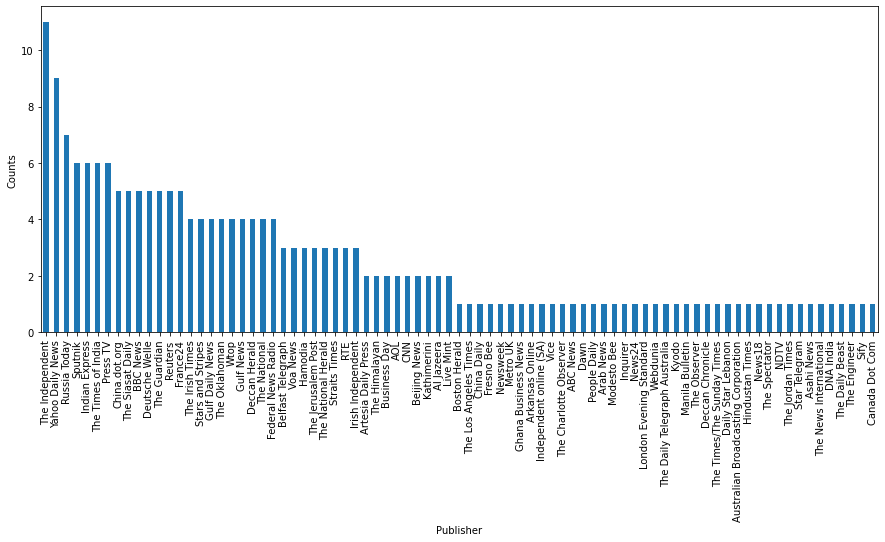

In [12]:
# Visualization of the news count from the different publishers.

plt.figure(figsize=(15,6))

plt.xlabel("Publisher")
plt.ylabel("Counts")


df.Publisher.value_counts().plot(kind='bar')

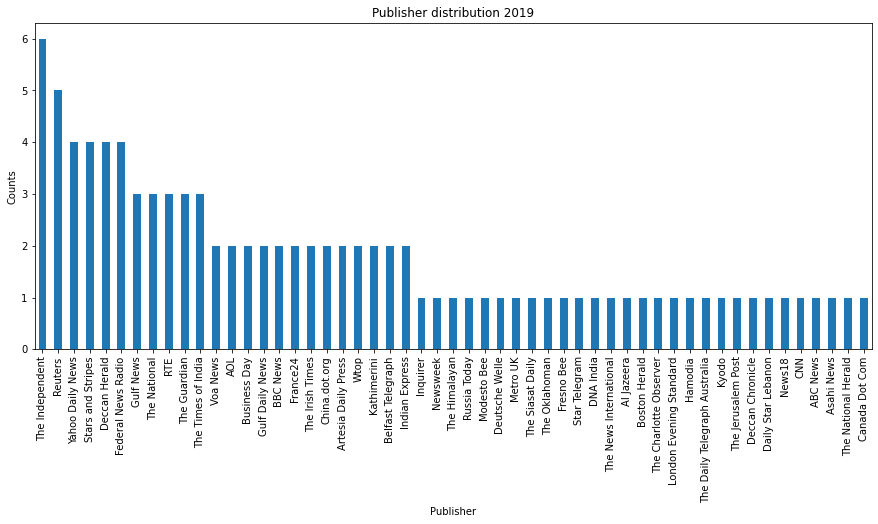

In [13]:
publisher_year = pd.DataFrame()
plt.figure(figsize=(15,6))

plt.xlabel("Publisher")
plt.ylabel("Counts")

publisher_year['2019'] = df[df['Year'] == 2019]['Publisher'].value_counts()
publisher_year['2020'] = df[df['Year'] == 2020]['Publisher'].value_counts()

publisher_year['2019'].plot.bar(title = 'Publisher distribution 2019')


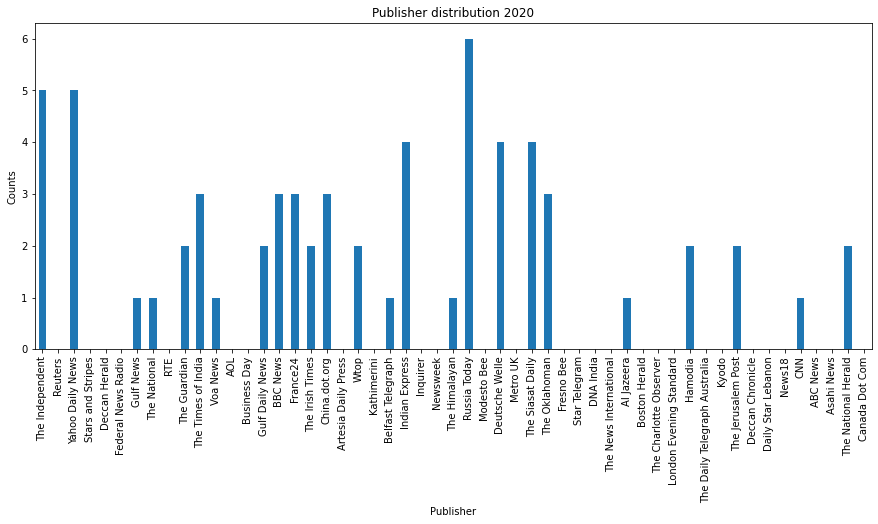

In [14]:
plt.figure(figsize=(15,6))

plt.xlabel("Publisher")
plt.ylabel("Counts")
publisher_year['2020'] = df[df['Year'] == 2020]['Publisher'].value_counts()

publisher_year['2020'].plot.bar(title = 'Publisher distribution 2020')

We would like to know the average number of news released over each period(ie. 2019 and 2020)

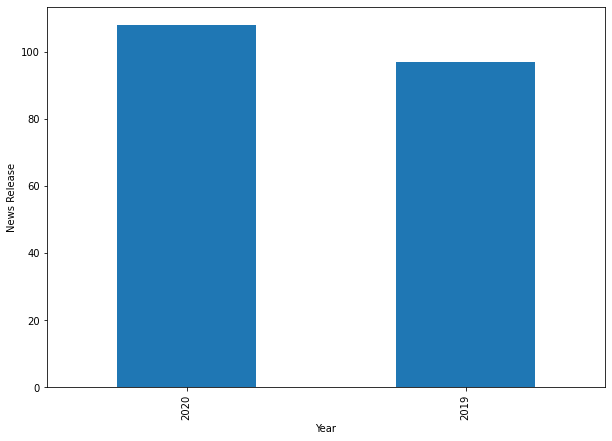

In [15]:
plt.figure(figsize=(10,7))

plt.xlabel("Year")
plt.ylabel("News Release")

df.Year.value_counts().plot(kind='bar')

to know whether the frequency of posts increases by the day

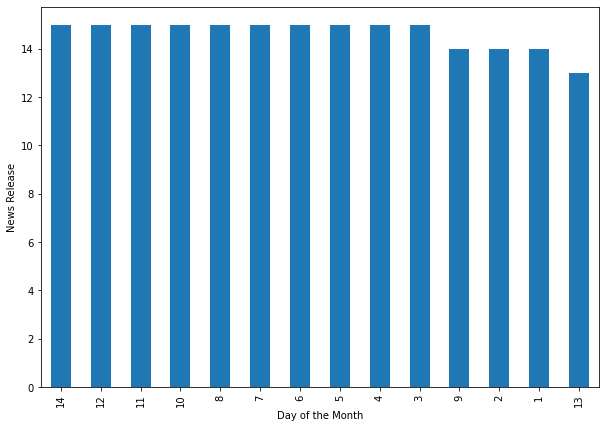

In [16]:
plt.figure(figsize=(10,7))

plt.xlabel("Day of the Month")
plt.ylabel("News Release")

df.Day.value_counts().plot(kind='bar')

## Comparison Analysis Study

In [19]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [20]:
# Contraction Mapping

!pip install contractions
import contractions

In [21]:
# To remove contractions in our title
df['Title'] = df['Title'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()

,id,Title,Publisher,Date,Year,Day,Link
0,0,"[India, and, Japan, hold, inaugural, security,...",Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/India_a...
1,1,"[Plane, crash, kills, nine,, injures, three, i...",Yahoo Daily News,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Plane_c...
2,2,"[China, accuses, UN, rights, chief, of, inflam...",Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/China_a...
3,3,"[Merry, Clickmas:, Black, Friday, online, sale...",Federal News Radio,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Merry_C...
4,4,"[People, convicted, of, terror, offenses, must...",Reuters,2019/12/01,2019,1,https://article.wn.com/view/2019/11/30/People_...


In [22]:
# To join the list of items back into one string
df['Title'] = [' '.join(map(str, l)) for l in df['Title']]
df.head()

,id,Title,Publisher,Date,Year,Day,Link
0,0,India and Japan hold inaugural security talks,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/India_a...
1,1,"Plane crash kills nine, injures three in South...",Yahoo Daily News,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Plane_c...
2,2,China accuses UN rights chief of inflaming Hon...,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/China_a...
3,3,Merry Clickmas: Black Friday online sales hit ...,Federal News Radio,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Merry_C...
4,4,People convicted of terror offenses must serve...,Reuters,2019/12/01,2019,1,https://article.wn.com/view/2019/11/30/People_...


In [23]:
# To remove the noise in the titles

import regex as re
df['Title'] = df['Title'].str.lower()
df['Title'] = df['Title'].apply(lambda x: re.sub(r"[^\w\d\s\']+", '', x))

df.head()

,id,Title,Publisher,Date,Year,Day,Link
0,0,india and japan hold inaugural security talks,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/India_a...
1,1,plane crash kills nine injures three in south ...,Yahoo Daily News,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Plane_c...
2,2,china accuses un rights chief of inflaming hon...,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/China_a...
3,3,merry clickmas black friday online sales hit r...,Federal News Radio,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Merry_C...
4,4,people convicted of terror offenses must serve...,Reuters,2019/12/01,2019,1,https://article.wn.com/view/2019/11/30/People_...


In [24]:
#Tokenization

df['Tokenized_title'] = df['Title'].apply(word_tokenize)
df.head()

,id,Title,Publisher,Date,Year,Day,Link,Tokenized_title
0,0,india and japan hold inaugural security talks,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/India_a...,"[india, and, japan, hold, inaugural, security,..."
1,1,plane crash kills nine injures three in south ...,Yahoo Daily News,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Plane_c...,"[plane, crash, kills, nine, injures, three, in..."
2,2,china accuses un rights chief of inflaming hon...,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/China_a...,"[china, accuses, un, rights, chief, of, inflam..."
3,3,merry clickmas black friday online sales hit r...,Federal News Radio,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Merry_C...,"[merry, clickmas, black, friday, online, sales..."
4,4,people convicted of terror offenses must serve...,Reuters,2019/12/01,2019,1,https://article.wn.com/view/2019/11/30/People_...,"[people, convicted, of, terror, offenses, must..."


In [25]:
# Stop words libraries

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


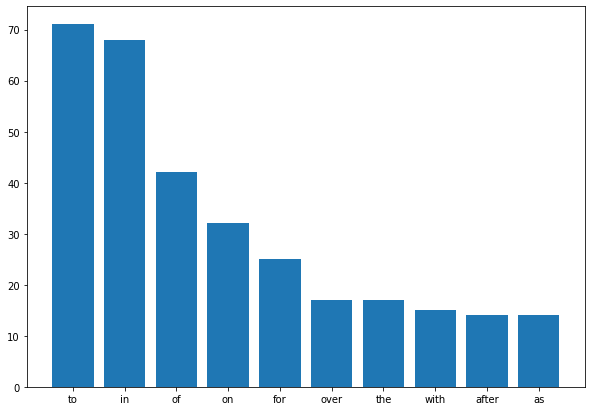

In [26]:
# Let's check the amount of stopwords that are appearing often in our title

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,7))
    plt.bar(x,y)

plot_top_stopwords_barchart(df['Title'])

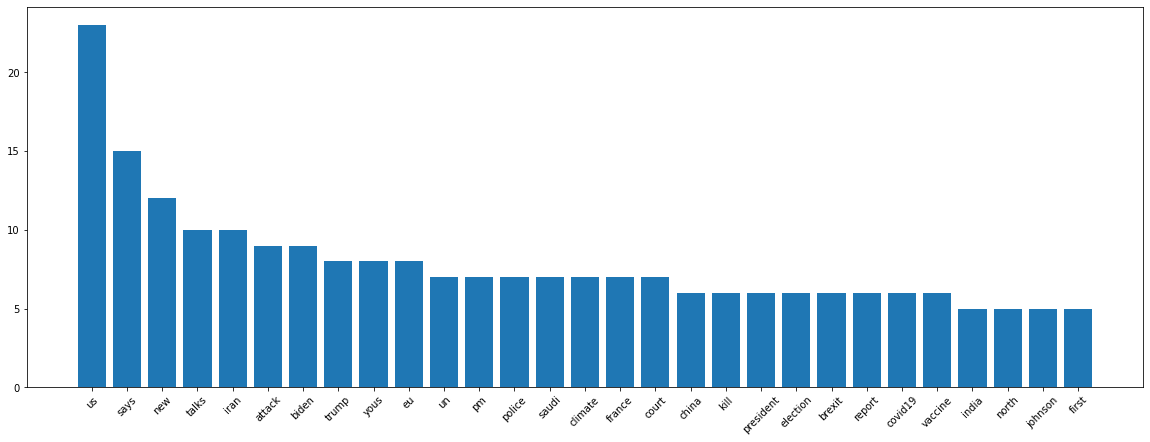

In [27]:
#Top words in our title, excluding stopwords

from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(20,7))
    plt.bar(x,y)
    plt.xticks(rotation=45)

plot_top_non_stopwords_barchart(df['Title'])


In [28]:
# Let us remove the stopwords 

df['Tokenized_title'] = df['Tokenized_title'].apply(lambda x: [word for word in x if word not in stop_words])
df['Tokenized_title_clean'] = [' '.join(map(str, l)) for l in df['Tokenized_title']]

df.head()

,id,Title,Publisher,Date,Year,Day,Link,Tokenized_title,Tokenized_title_clean
0,0,india and japan hold inaugural security talks,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/India_a...,"[india, japan, hold, inaugural, security, talks]",india japan hold inaugural security talks
1,1,plane crash kills nine injures three in south ...,Yahoo Daily News,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Plane_c...,"[plane, crash, kills, nine, injures, three, so...",plane crash kills nine injures three south dakota
2,2,china accuses un rights chief of inflaming hon...,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/China_a...,"[china, accuses, un, rights, chief, inflaming,...",china accuses un rights chief inflaming hong k...
3,3,merry clickmas black friday online sales hit r...,Federal News Radio,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Merry_C...,"[merry, clickmas, black, friday, online, sales...",merry clickmas black friday online sales hit r...
4,4,people convicted of terror offenses must serve...,Reuters,2019/12/01,2019,1,https://article.wn.com/view/2019/11/30/People_...,"[people, convicted, terror, offenses, must, se...",people convicted terror offenses must serve fu...


In [29]:
df.tail()

,id,Title,Publisher,Date,Year,Day,Link,Tokenized_title,Tokenized_title_clean
202,200,probe of biden's son places new scrutiny on us...,Beijing News,2020/12/14,2020,14,https://article.wn.com/view/2020/12/14/Probe_o...,"[probe, biden, 's, son, places, new, scrutiny,...",probe biden 's son places new scrutiny us atto...
203,201,oil tanker off saudi arabian port hit by explo...,The Guardian,2020/12/14,2020,14,https://article.wn.com/view/2020/12/14/Oil_tan...,"[oil, tanker, saudi, arabian, port, hit, explo...",oil tanker saudi arabian port hit explosion ca...
204,202,ni blood donation rules further relaxed for ga...,BBC News,2020/12/14,2020,14,https://article.wn.com/view/2020/12/14/NI_bloo...,"[ni, blood, donation, rules, relaxed, gay, bis...",ni blood donation rules relaxed gay bisexual men
205,203,prince andrew itinerary claimed to cast doubt ...,Sputnik,2020/12/14,2020,14,https://article.wn.com/view/2020/12/14/Prince_...,"[prince, andrew, itinerary, claimed, cast, dou...",prince andrew itinerary claimed cast doubt 'ca...
206,204,next four to six months could be worst of covi...,Indian Express,2020/12/14,2020,14,https://article.wn.com/view/2020/12/14/Next_fo...,"[next, four, six, months, could, worst, covid1...",next four six months could worst covid19 bill ...


Looking at the last rows, I observed that the 'id' column does not match the index of the dataframe. I think this is because of the two duplicate rows we removed in the beginning. I will reset the index.

In [30]:
data_set = df.reset_index(drop=True)
data_set.tail()

,id,Title,Publisher,Date,Year,Day,Link,Tokenized_title,Tokenized_title_clean
200,200,probe of biden's son places new scrutiny on us...,Beijing News,2020/12/14,2020,14,https://article.wn.com/view/2020/12/14/Probe_o...,"[probe, biden, 's, son, places, new, scrutiny,...",probe biden 's son places new scrutiny us atto...
201,201,oil tanker off saudi arabian port hit by explo...,The Guardian,2020/12/14,2020,14,https://article.wn.com/view/2020/12/14/Oil_tan...,"[oil, tanker, saudi, arabian, port, hit, explo...",oil tanker saudi arabian port hit explosion ca...
202,202,ni blood donation rules further relaxed for ga...,BBC News,2020/12/14,2020,14,https://article.wn.com/view/2020/12/14/NI_bloo...,"[ni, blood, donation, rules, relaxed, gay, bis...",ni blood donation rules relaxed gay bisexual men
203,203,prince andrew itinerary claimed to cast doubt ...,Sputnik,2020/12/14,2020,14,https://article.wn.com/view/2020/12/14/Prince_...,"[prince, andrew, itinerary, claimed, cast, dou...",prince andrew itinerary claimed cast doubt 'ca...
204,204,next four to six months could be worst of covi...,Indian Express,2020/12/14,2020,14,https://article.wn.com/view/2020/12/14/Next_fo...,"[next, four, six, months, could, worst, covid1...",next four six months could worst covid19 bill ...


In [31]:
# My Dictionaries

politicsDict = ['biden', 'trump', 'brexit', 'president','pm', 'eu', 'prince', 'election', 'candidates', 'power', 'minister', 'vote', 'voting']
conflictDict = ['attack', 'police', 'terror', 'murder','kill','fighting','security', 'assasination', 'killed', 'military', 'iran', 'insurgency', 'afghanistan', 'shootings','saudi', 'court', 'explode', 'grenade', 'strike', 'assault', 'taliban', 'dispute', 'force', 'missile' ,'shooting', 'terror']
accidentDict = ['injuries', 'death', 'mistake', 'crash', 'accident']
healthDict = ['vaccine', 'covid19', 'china', 'covid', 'drug', 'blood', 'health']
climateDict = ['climate', 'weather', 'emissions','global', 'eruption']
generalDict = ['france', 'un', 'region', 'gender', 'pension', 'policy', 'ties', 'assembly', 'study', 'economic', 'economy']
businessDict = ['sales','ceo', 'black friday', 'venture', 'business', 'cocacola']
legalDict = ['court', 'judge', 'trial', 'defamation', 'case', 'law', 'sentenced','prisoner', 'prison','sues', 'sentences', 'arrested', 'crime', 'criminal']
sportsDict = ['games', 'scores', 'score', 'olympics','soccer']

category = [["politics",politicsDict], ["conflict", conflictDict], ["health",healthDict], ["climate",climateDict], ["general",generalDict], ["accident",accidentDict], ["business",businessDict], ["legal",legalDict],["sports",sportsDict]]

In [32]:
unmatchedwords = data_set['Tokenized_title_clean'].tolist()
matched = []


def matchWord(category, unmatchedwords):
    is_current_title_categorized = False
    for x in range(len(category)):
        for y in range(len(category[x][1])):
            if category[x][1][y] in unmatchedwords[i]:
                is_current_title_categorized = True
                categorized = [unmatchedwords[i],category[x][0]]
                matched.append(categorized)
              #  del unmatchedwords[i]
                return
    if is_current_title_categorized == False:
        matched.append([unmatchedwords[i],'general'])

for i in range(len(data_set)):
    matchWord(category, unmatchedwords)
matched

[['india japan hold inaugural security talks', 'conflict'],
 ['plane crash kills nine injures three south dakota', 'conflict'],
 ['china accuses un rights chief inflaming hong kong unrest', 'health'],
 ['merry clickmas black friday online sales hit record 74b', 'business'],
 ['people convicted terror offenses must serve full prison terms uk pm',
  'politics'],
 ['mont blanc avalanche two skiers die accident italian alps', 'accident'],
 ['fury india priyanka reddy rapemurder case', 'conflict'],
 ["montana governor bullock quits democrats ' 2020 presidential race",
  'politics'],
 ['us drone strike killed afghan civilians including woman given birth officials say',
  'conflict'],
 ['nissan new ceo reaffirms alliance promises revival', 'business'],
 ['putin xi oversee launch landmark russian gas pipeline china', 'health'],
 ['âwe want give impression ukraine beggingâ volodymyr zelensky says',
  'general'],
 ['britain honour dead vigil london bridge attack', 'conflict'],
 ['scores philippi

In [33]:
categorized_df = pd.DataFrame(matched)
categorized_df

,0,1
0,india japan hold inaugural security talks,conflict
1,plane crash kills nine injures three south dakota,conflict
2,china accuses un rights chief inflaming hong k...,health
3,merry clickmas black friday online sales hit r...,business
4,people convicted terror offenses must serve fu...,politics
5,mont blanc avalanche two skiers die accident i...,accident
6,fury india priyanka reddy rapemurder case,conflict
7,montana governor bullock quits democrats ' 202...,politics
8,us drone strike killed afghan civilians includ...,conflict
9,nissan new ceo reaffirms alliance promises rev...,business


In [34]:
# Rename the columns
categorized_df.rename(columns={0: "Matched_title", 1: "Topic"}, inplace=True)
categorized_df.head()

,Matched_title,Topic
0,india japan hold inaugural security talks,conflict
1,plane crash kills nine injures three south dakota,conflict
2,china accuses un rights chief inflaming hong k...,health
3,merry clickmas black friday online sales hit r...,business
4,people convicted terror offenses must serve fu...,politics


In [35]:
#Merging both dataframes

Categorized_df = pd.concat([data_set, categorized_df], axis=1)
Categorized_df

,id,Title,Publisher,Date,Year,Day,Link,Tokenized_title,Tokenized_title_clean,Matched_title,Topic
0,0,india and japan hold inaugural security talks,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/India_a...,"[india, japan, hold, inaugural, security, talks]",india japan hold inaugural security talks,india japan hold inaugural security talks,conflict
1,1,plane crash kills nine injures three in south ...,Yahoo Daily News,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Plane_c...,"[plane, crash, kills, nine, injures, three, so...",plane crash kills nine injures three south dakota,plane crash kills nine injures three south dakota,conflict
2,2,china accuses un rights chief of inflaming hon...,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/China_a...,"[china, accuses, un, rights, chief, inflaming,...",china accuses un rights chief inflaming hong k...,china accuses un rights chief inflaming hong k...,health
3,3,merry clickmas black friday online sales hit r...,Federal News Radio,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Merry_C...,"[merry, clickmas, black, friday, online, sales...",merry clickmas black friday online sales hit r...,merry clickmas black friday online sales hit r...,business
4,4,people convicted of terror offenses must serve...,Reuters,2019/12/01,2019,1,https://article.wn.com/view/2019/11/30/People_...,"[people, convicted, terror, offenses, must, se...",people convicted terror offenses must serve fu...,people convicted terror offenses must serve fu...,politics
5,5,mont blanc avalanche two skiers die in acciden...,The Independent,2019/12/01,2019,1,https://article.wn.com/view/2019/11/30/Mont_Bl...,"[mont, blanc, avalanche, two, skiers, die, acc...",mont blanc avalanche two skiers die accident i...,mont blanc avalanche two skiers die accident i...,accident
6,6,fury in india over priyanka reddy rapemurder case,Gulf News,2019/12/01,2019,1,https://article.wn.com/view/2019/11/30/Fury_in...,"[fury, india, priyanka, reddy, rapemurder, case]",fury india priyanka reddy rapemurder case,fury india priyanka reddy rapemurder case,conflict
7,7,montana governor bullock quits democrats' 2020...,Reuters,2019/12/02,2019,2,https://article.wn.com/view/2019/12/02/Montana...,"[montana, governor, bullock, quits, democrats,...",montana governor bullock quits democrats ' 202...,montana governor bullock quits democrats ' 202...,politics
8,8,us drone strike killed afghan civilians includ...,The Independent,2019/12/02,2019,2,https://article.wn.com/view/2019/12/02/US_dron...,"[us, drone, strike, killed, afghan, civilians,...",us drone strike killed afghan civilians includ...,us drone strike killed afghan civilians includ...,conflict
9,9,nissan new ceo reaffirms alliance promises rev...,Asahi News,2019/12/02,2019,2,https://article.wn.com/view/2019/12/02/Nissan_...,"[nissan, new, ceo, reaffirms, alliance, promis...",nissan new ceo reaffirms alliance promises rev...,nissan new ceo reaffirms alliance promises rev...,business


In [36]:
# Deleting columns we no longer need

Categorized_df.drop('Tokenized_title', axis=1, inplace=True)
Categorized_df.drop('Tokenized_title_clean', axis=1, inplace=True)
Categorized_df.drop('Matched_title', axis=1, inplace=True)
Categorized_df.head()

,id,Title,Publisher,Date,Year,Day,Link,Topic
0,0,india and japan hold inaugural security talks,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/India_a...,conflict
1,1,plane crash kills nine injures three in south ...,Yahoo Daily News,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Plane_c...,conflict
2,2,china accuses un rights chief of inflaming hon...,Stars and Stripes,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/China_a...,health
3,3,merry clickmas black friday online sales hit r...,Federal News Radio,2019/12/01,2019,1,https://article.wn.com/view/2019/12/01/Merry_C...,business
4,4,people convicted of terror offenses must serve...,Reuters,2019/12/01,2019,1,https://article.wn.com/view/2019/11/30/People_...,politics


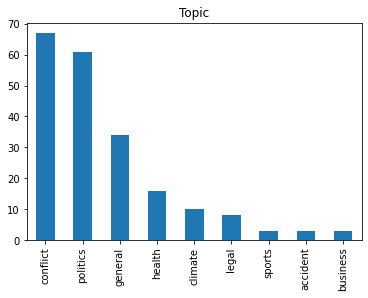

In [37]:
# Lets plot the Topics distribution

topic_counts = Categorized_df['Topic'].value_counts()

topic_counts.plot.bar(title = 'Topic')


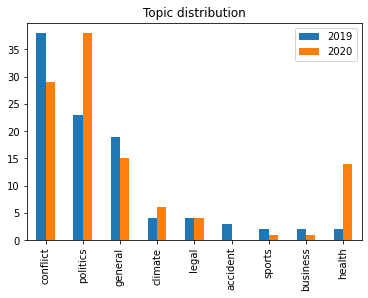

In [39]:
#topic by year
topic_year = pd.DataFrame()

topic_year['2019'] = Categorized_df[Categorized_df['Year'] == 2019]['Topic'].value_counts()
topic_year['2020'] = Categorized_df[Categorized_df['Year'] == 2020]['Topic'].value_counts()

topic_year.plot.bar(title = 'Topic distribution')



### Interaction with the User

In [35]:
print("The topics we have are politics, conflict, covid19, weather, general, sports, business, health.")
userchoice = input("Please enter the topic you are interested in: ")

def getTopics(userchoice):
    is_category = Categorized_df['Topic'] == userchoice
    category_list = Categorized_df[is_category]
    category_list = category_list.drop(['Publisher', 'Date', 'Year', 'Day', 'Link', ], axis=1)
    return category_list

getTopics(userchoice)


    

The topics we have are politics, conflict, covid19, weather, general.
Please enter the topic you are interested in: health


,id,Title,Topic
2,2,china accuses un rights chief of inflaming hon...,health
10,10,putin and xi oversee launch of landmark russia...,health
98,98,business venture linked to mark zuckerberg use...,health
104,104,drug reverses agerelated cognitive decline wit...,health
106,106,crime gangs threaten covid19 vaccine campaigns...,health
119,119,fauci apologises after implied criticism of uk...,health
122,122,china achieves quantum supremacy in major comp...,health
157,157,british grandmother becomes first person in th...,health
170,170,covid19 cases in tokyo surge to record 602 new...,health
177,177,sanofi gsk covid vaccine to be ready only at t...,health


In [36]:
choice_id = input("Please enter the id of the particular news you want: ")

def getLink(choice_id):
    is_id = Categorized_df['id'] == int(choice_id)
    choice_list = Categorized_df[is_id]
    choice_list = choice_list.drop(['Publisher', 'Date', 'Year', 'Day', 'Topic'], axis=1)
    return choice_list.to_dict(orient="list")

getLink(choice_id)


Please enter the id of the particular news you want: 184


{'Link': ['https://article.wn.com/view/2020/12/12/US_approves_Pfizer_vaccine_as_millions_of_doses_begin_shippi_r/'],
 'Title': ['us approves pfizer vaccine as millions of doses begin shipping'],
 'id': [184]}